In [1]:
using ColoringNames
Plots.gr()

Plots.GRBackend()

In [2]:
runnum = "2"
function mklogdir(name)
    logdir = joinpath(pwd(), "logs", "dist", name * runnum)
    mkpath(logdir)
    logdir
end

mklogdir (generic function with 1 method)

In [69]:
show_demo=true
function qualitative_demo(mdl, do_oov=true)
    if show_demo
        plot_query(mdl,  "brownish green") |> display
        plot_query(mdl,  "brown") |> display
        plot_query(mdl,  "brownish") |> display
        plot_query(mdl,  "greenish") |> display
        plot_query(mdl,  "greenish brown") |> display
        plot_query(mdl,  "green")|> display
        
        plot_query(mdl,  "bluish grey")|> display
        plot_query(mdl,  "greyish blue")|> display
        #plot_query(mdl, "pink-purple") |> display
        #plot_query(mdl, "purple-pink") |> display
        #plot_query(mdl, "brown-orange") |> display
        #plot_query(mdl, "orange-brown") |> display
        #plot_query(mdl, "orange-yellow") |> display
        #plot_query(mdl, "yellow-orange") |> display
        
        do_oov && plot_query(mdl,  "ish")|> display
    else
        info("showing demo disabled, set `show_demo=true` to display")
    end
end

qualitative_demo(mdl::TermToColorDistributionEmpirical) = qualitative_demo(mdl, false)

qualitative_demo (generic function with 3 methods)

In [4]:
many_names = load_color_nameset()
word_embs, vocab, enc = load_text_embeddings(keep_words=many_names)
cldata = load_munroe_data(dev_as_train=false, dev_as_test=true, encoding_ = enc)

ColoringNames.ColorDatasets{MLLabelUtils.LabelEnc.NativeLabels{String,2833},ColoringNames.ColorDataset{Array{Any,1},Array{Int64,2},Array{Float32,2}}}(MLLabelUtils.LabelEnc.NativeLabels{String,2833}(String["and", "of", "a", "with", "'s", "not", "-", "your", "just", "can"  …  "Feijoa", "melanzane", "minsk", "Pizazz", "feijoa", "red1", "Kilamanjaro", "karaka", "bilbao", "mabel"], Dict("Apple"=>157,"Caper"=>2160,"chocolate"=>424,"Casablanca"=>1155,"Many"=>84,"Luxor"=>1613,"star"=>103,"canyon"=>900,"bombay"=>2563,"bondi"=>2662…)), ColoringNames.ColorDataset{Array{Any,1},Array{Int64,2},Array{Float32,2}}(Any["acid green", "acid green", "acid green", "acid green", "acid green", "acid green", "acid green", "acid green", "acid green", "acid green"  …  "yuck", "yuck", "yuck", "yuck", "yuck", "yuck", "yuck", "yuck", "yuck", "yuck"], [338 338 … 2148 2148; 114 114 … 0 0; 0 0 … 0 0; 0 0 … 0 0], Float32[0.344113 0.855319 0.921569; 0.281905 0.744681 0.921569; … ; 0.376894 0.768559 0.898039; 0.179104 0.

In [29]:
sowe_unsmoothed = TermToColorDistributionSOWE(enc, word_embs; n_steps=size(cldata.train.terms_padded,1))
train!(sowe_unsmoothed, cldata, Val{false}();
        log_dir = mklogdir("sowe_unsmoothed"),
        batch_size = 829,
        min_epochs=200,
        max_epochs=30_000,
        )
@show evaluate(sowe_unsmoothed, cldata.dev)

es_loss = 1.6626016899693692e7
es_loss = 1.1380008402109494e7
es_loss = 8.942010489342082e6
es_loss = 7.414909024014259e6
es_loss = 5.472551948937554e6
es_loss = 4.0842122419280224e6
es_loss = 3.231728661658431e6
es_loss = 2.689354198858415e6
es_loss = 2.341011080316617e6
es_loss = 2.1070290393700646e6
es_loss = 1.9325461027492075e6
es_loss = 1.8067670859175127e6
es_loss = 1.7174629799663133e6
es_loss = 1.6516920192386215e6
es_loss = 1.5982471919046731e6
es_loss = 1.5551053708352624e6
es_loss = 1.5230133056002764e6
es_loss = 1.488102961664146e6
es_loss = 1.466043621628816e6
es_loss = 1.444495243974689e6
es_loss = 1.4282433059917078e6
es_loss = 1.4145138686367578e6
es_loss = 1.3981102033291087e6
es_loss = 1.3875996079132787e6
es_loss = 1.3763278505600542e6
es_loss = 1.3661085807556645e6
es_loss = 1.356755609612235e6
es_loss = 1.349179480429622e6
es_loss = 1.3425123636358574e6
es_loss = 1.33565206120256e6
es_loss = 1.3290780955685098e6
es_loss = 1.325029086448874e6
es_loss = 1.3166149062

Dict{Symbol,Float64} with 6 entries:
  :perp            => 1.24772e6
  :perp_val        => 124.43
  :mse_to_distmean => 0.0676719
  :perp_sat        => 165.215
  :mse_to_distmode => 0.127506
  :perp_hue        => 60.6933

In [30]:
qualitative_demo(sowe_unsmoothed)

In [31]:
sowe_smoothed = TermToColorDistributionSOWE(enc, word_embs; n_steps=size(cldata.train.terms_padded,1))
train!(sowe_smoothed, cldata, Val{true}();
        log_dir=mklogdir("sowe_smoothed"),
        batch_size = 829,
        min_epochs=200,
        max_epochs=30_000,
        )
@show evaluate(sowe_smoothed, cldata.dev)

es_loss = 1.669146649396227e7
es_loss = 1.1562719844247557e7
es_loss = 9.017298484354245e6
es_loss = 7.402716561710726e6
es_loss = 5.385201175917784e6
es_loss = 3.9608634169509728e6
es_loss = 3.118858900021333e6
es_loss = 2.6056900568869966e6
es_loss = 2.285203210153121e6
es_loss = 2.0624381343609209e6
es_loss = 1.9126810063868025e6
es_loss = 1.7996241336592708e6
es_loss = 1.7154799043978201e6
es_loss = 1.6526814590955824e6
es_loss = 1.6052051000113785e6
es_loss = 1.5648103105651024e6
es_loss = 1.5333546098064077e6
es_loss = 1.5018726846964546e6
es_loss = 1.4822180215687265e6
es_loss = 1.4609790301823495e6
es_loss = 1.445682097688339e6
es_loss = 1.4302843376410997e6
es_loss = 1.4170414253030443e6
es_loss = 1.4046540099893007e6
es_loss = 1.3912100999695938e6
es_loss = 1.3808094043752402e6
es_loss = 1.3735534755567901e6
es_loss = 1.360612287014373e6
es_loss = 1.3546006760780395e6
es_loss = 1.3479120635543284e6
es_loss = 1.3437943029481014e6
es_loss = 1.3341760862984098e6
es_loss = 1.3310

Dict{Symbol,Float64} with 6 entries:
  :perp            => 1.30161e6
  :perp_val        => 125.492
  :mse_to_distmean => 0.069414
  :perp_sat        => 167.237
  :mse_to_distmode => 0.0993774
  :perp_hue        => 62.0204

In [32]:
rnn_unsmoothed = TermToColorDistributionRNN(enc, word_embs; n_steps=size(cldata.train.terms_padded,1))
train!(rnn_unsmoothed, cldata, Val{false}();
        log_dir = mklogdir("rnn_unsmoothed"),
        batch_size = 829,
        max_epochs=30_000,
        )
@show evaluate(rnn_unsmoothed, cldata.dev)


es_loss = 1.6741466770508058e7
es_loss = 1.07383289079635e7
es_loss = 9.44242254038384e6
es_loss = 8.711957875741363e6
es_loss = 8.126229616556798e6
es_loss = 6.995383852094233e6
es_loss = 5.687988275416197e6
es_loss = 4.472164909266583e6
es_loss = 3.909643252648641e6
es_loss = 3.65444953365307e6
es_loss = 3.4732113495628578e6
es_loss = 3.3173251692869524e6
es_loss = 3.2164797313829213e6
es_loss = 2.985697288740247e6
es_loss = 2.7072794944675234e6
es_loss = 2.3116702674014904e6
es_loss = 2.014094611765095e6
es_loss = 1.8456604409483774e6
es_loss = 1.7365282853736388e6
es_loss = 1.6433938574686525e6
es_loss = 1.5872538627314097e6
es_loss = 1.541721190301424e6
es_loss = 1.5294126659459993e6
es_loss = 1.495866309335648e6
es_loss = 1.4987255902897734e6
evaluate(rnn_unsmoothed, cldata.dev) = Dict(:perp=>1.49873e6,:perp_val=>127.22,:mse_to_distmean=>0.0756123,:perp_sat=>170.856,:mse_to_distmode=>0.124776,:perp_hue=>68.9507)


Dict{Symbol,Float64} with 6 entries:
  :perp            => 1.49873e6
  :perp_val        => 127.22
  :mse_to_distmean => 0.0756123
  :perp_sat        => 170.856
  :mse_to_distmode => 0.124776
  :perp_hue        => 68.9507

In [33]:
qualitative_demo(rnn_unsmoothed)

In [34]:
rnn_smoothed = TermToColorDistributionRNN(enc, word_embs; n_steps=size(cldata.train.terms_padded,1))
train!(rnn_smoothed, cldata, Val{true}();
        log_dir = mklogdir("rnn_smoothed"),
        batch_size = 829,
        max_epochs=30_000,
        )

@show evaluate(rnn_smoothed, cldata.dev)

es_loss = 1.6762218665524065e7
es_loss = 1.0940451203736097e7
es_loss = 9.523484944619156e6
es_loss = 8.658285542946072e6
es_loss = 8.208231694331538e6
es_loss = 7.181655997444129e6
es_loss = 5.766220076480172e6
es_loss = 4.385485991362313e6
es_loss = 3.913942967418712e6
es_loss = 3.720817479255618e6
es_loss = 3.6259881803606832e6
es_loss = 3.5342592198437513e6
es_loss = 3.3300755724172466e6
es_loss = 3.1484634120159606e6
es_loss = 2.5654674794417135e6
es_loss = 2.2543290025872607e6
es_loss = 2.0317517924444454e6
es_loss = 1.8730535624602763e6
es_loss = 1.771773486235885e6
es_loss = 1.658954739647311e6
es_loss = 1.5832802205739906e6
es_loss = 1.5731084358243488e6
es_loss = 1.547136383185687e6
es_loss = 1.5092972659113393e6
es_loss = 1.5211586793170888e6
evaluate(rnn_smoothed, cldata.dev) = Dict(:perp=>1.52116e6,:perp_val=>126.615,:mse_to_distmean=>0.076393,:perp_sat=>171.353,:mse_to_distmode=>0.112637,:perp_hue=>70.1129)


Dict{Symbol,Float64} with 6 entries:
  :perp            => 1.52116e6
  :perp_val        => 126.615
  :mse_to_distmean => 0.076393
  :perp_sat        => 171.353
  :mse_to_distmode => 0.112637
  :perp_hue        => 70.1129

In [35]:
qualitative_demo(rnn_smoothed)

In [36]:
cnn_unsmoothed = TermToColorDistributionCNN(enc, word_embs; n_steps=size(cldata.train.terms_padded,1))
train!(cnn_unsmoothed, cldata, Val{false}();
        log_dir=mklogdir("cnn_unsmoothed"),
        batch_size = 829,
        max_epochs=30_000,
        )

@show evaluate(cnn_unsmoothed, cldata.dev)

es_loss = 1.672601785870211e7
es_loss = 1.2015275092145856e7
es_loss = 9.36661744243674e6
es_loss = 9.109325803189887e6
es_loss = 8.430856514308307e6
es_loss = 7.759424572182472e6
es_loss = 6.29364875334125e6
es_loss = 4.212910069342219e6
es_loss = 2.812640245227187e6
es_loss = 2.2191734992228267e6
es_loss = 1.9417267290681847e6
es_loss = 1.7416855534491804e6
es_loss = 1.5760220704264992e6
es_loss = 1.4620081198899618e6
es_loss = 1.3975723700714181e6
es_loss = 1.3569961564089921e6
es_loss = 1.3312003672399432e6
es_loss = 1.3120243158907068e6
es_loss = 1.2974342626701198e6
es_loss = 1.2862005429254784e6
es_loss = 1.2776085199094028e6
es_loss = 1.2702112939952384e6
es_loss = 1.2647470571556292e6
es_loss = 1.2593810899003951e6
es_loss = 1.2562153072497505e6
es_loss = 1.2519773119504794e6
es_loss = 1.2485435435547787e6
es_loss = 1.247997539512365e6
es_loss = 1.2448320992981058e6
es_loss = 1.2427960675773458e6
es_loss = 1.2410666119435858e6
es_loss = 1.2402724338996543e6
es_loss = 1.2389969

Dict{Symbol,Float64} with 6 entries:
  :perp            => 1.2369e6
  :perp_val        => 123.476
  :mse_to_distmean => 0.0668996
  :perp_sat        => 164.37
  :mse_to_distmode => 0.121519
  :perp_hue        => 60.9437

In [37]:
qualitative_demo(cnn_unsmoothed)

In [38]:
1

1

In [39]:
cnn_smoothed = TermToColorDistributionCNN(enc, word_embs; n_steps=size(cldata.train.terms_padded,1))
train!(cnn_smoothed, cldata, Val{true}();
        log_dir=mklogdir("cnn_smoothed"),
        batch_size = 829,
        max_epochs=30_000,
        )

@show evaluate(cnn_smoothed, cldata.dev)

es_loss = 1.6737793258904357e7
es_loss = 1.2153965841778588e7
es_loss = 9.456936922245186e6
es_loss = 9.205904417156694e6
es_loss = 8.575042808971934e6
es_loss = 7.999939562871954e6
es_loss = 6.7890798543564705e6
es_loss = 5.076158459148306e6
es_loss = 3.6588924102745736e6
es_loss = 2.5604767183296513e6
es_loss = 2.1135224875818146e6
es_loss = 1.8986730459156034e6
es_loss = 1.6682733471147695e6
es_loss = 1.504683486896622e6
es_loss = 1.4180712898264213e6
es_loss = 1.3720469684343138e6
es_loss = 1.3390268226415443e6
es_loss = 1.3164384668822861e6
es_loss = 1.2996443056272932e6
es_loss = 1.2864241965209302e6
es_loss = 1.2761803002220734e6
es_loss = 1.269369966333315e6
es_loss = 1.2611638709040089e6
es_loss = 1.2567906697826856e6
es_loss = 1.2523449241687194e6
es_loss = 1.2489561988159071e6
es_loss = 1.244385991346861e6
es_loss = 1.2418706512593946e6
es_loss = 1.2380016232174826e6
es_loss = 1.2353300443173293e6
es_loss = 1.2331897769734778e6
es_loss = 1.2316351856551466e6
es_loss = 1.2296

Dict{Symbol,Float64} with 6 entries:
  :perp            => 1.22069e6
  :perp_val        => 122.072
  :mse_to_distmean => 0.0667655
  :perp_sat        => 163.769
  :mse_to_distmode => 0.100369
  :perp_hue        => 61.0603

(h_max, s_max, v_max) = (0.984313725490196, 0.9686274509803922, 0.9686274509803922)


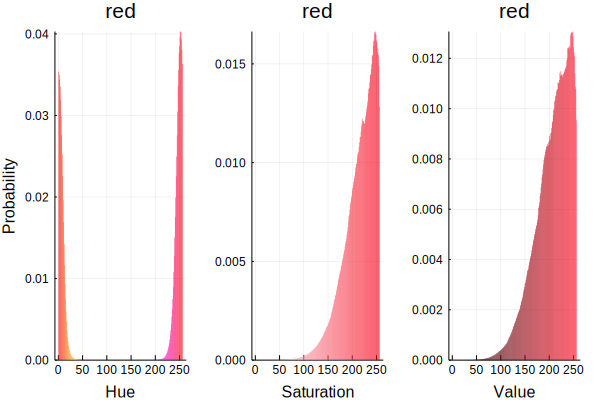

In [40]:
plot_query(cnn_smoothed, "red")

In [41]:
qualitative_demo(cnn_smoothed)

In [42]:
noml_unsmoothed = TermToColorDistributionEmpirical(256)
train!(noml_unsmoothed, cldata, Val{false}())
@show evaluate(noml_unsmoothed, cldata.dev)

evaluate(noml_unsmoothed, cldata.dev) = Dict(:perp=>2.60745e6,:perp_val=>171.55,:mse_to_distmean=>0.0663557,:perp_sat=>223.387,:mse_to_distmode=>0.133736,:perp_hue=>68.0402)


Dict{Symbol,Float64} with 6 entries:
  :perp            => 2.60745e6
  :perp_val        => 171.55
  :mse_to_distmean => 0.0663557
  :perp_sat        => 223.387
  :mse_to_distmode => 0.133736
  :perp_hue        => 68.0402

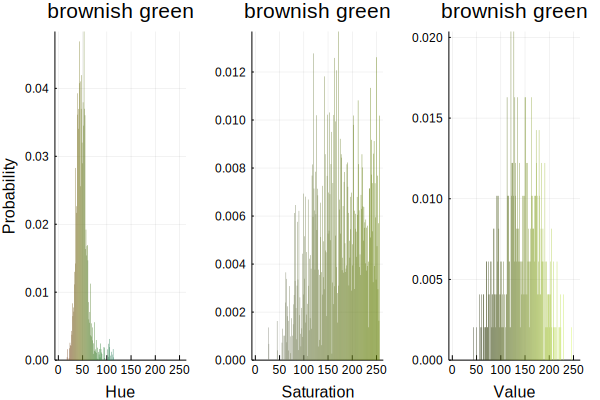

(h_max, s_max, v_max) = (0.20392156862745098, 0.6705882352941176, 0.49411764705882355)


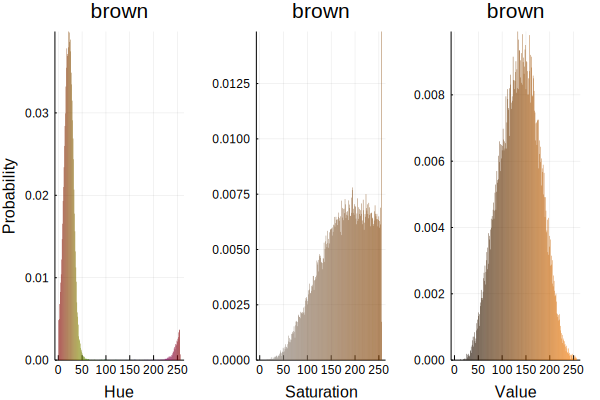

(h_max, s_max, v_max) = (0.08235294117647059, 1.0, 0.5176470588235295)


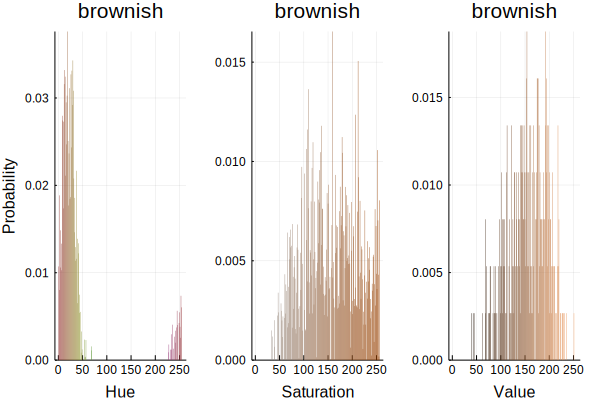

(h_max, s_max, v_max) = (0.07058823529411765, 0.6196078431372549, 0.6)


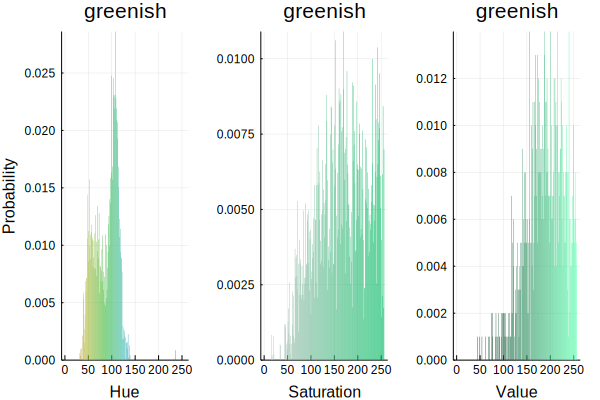

(h_max, s_max, v_max) = (0.4196078431372549, 0.6588235294117647, 0.7333333333333333)


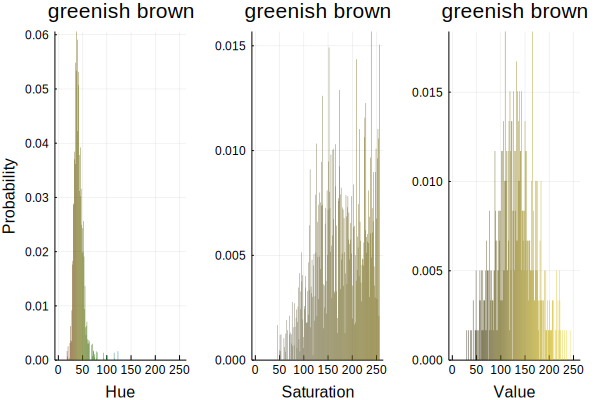

(h_max, s_max, v_max) = (0.1450980392156863, 0.9333333333333333, 0.4235294117647059)


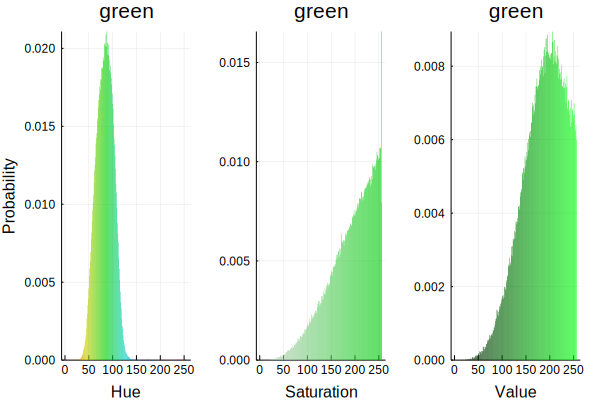

(h_max, s_max, v_max) = (0.3411764705882353, 1.0, 0.803921568627451)


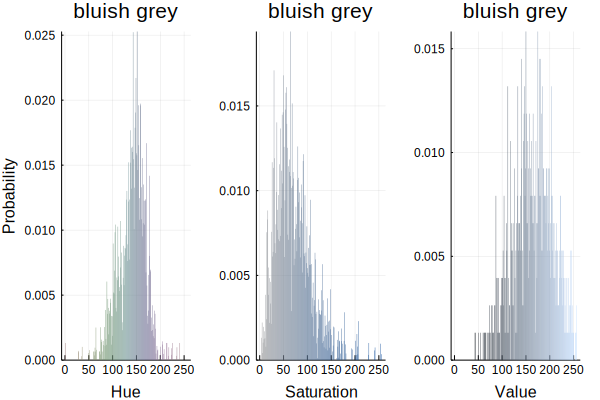

(h_max, s_max, v_max) = (0.592156862745098, 0.24705882352941178, 0.5843137254901961)


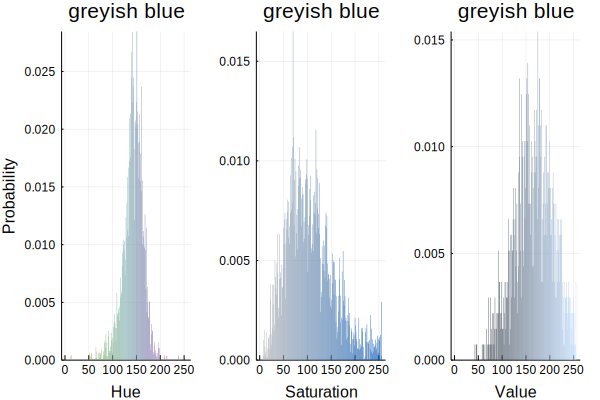

(h_max, s_max, v_max) = (0.5882352941176471, 0.27058823529411763, 0.6823529411764706)


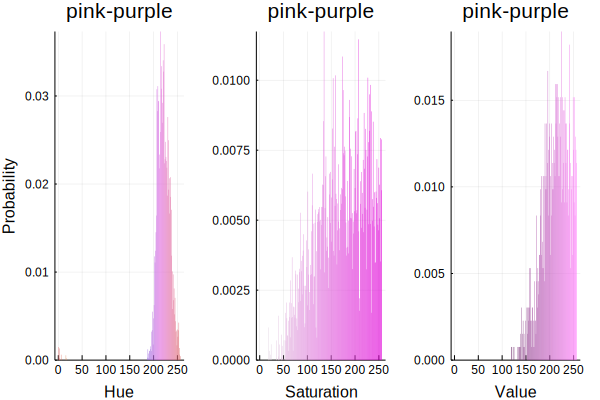

(h_max, s_max, v_max) = (0.8392156862745098, 0.5254901960784314, 0.8784313725490196)


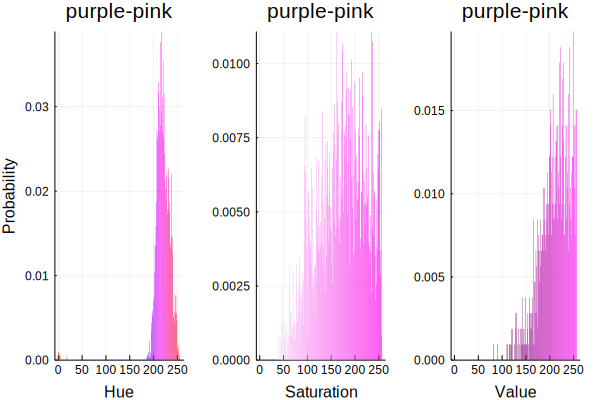

(h_max, s_max, v_max) = (0.8431372549019608, 0.9176470588235294, 0.9725490196078431)


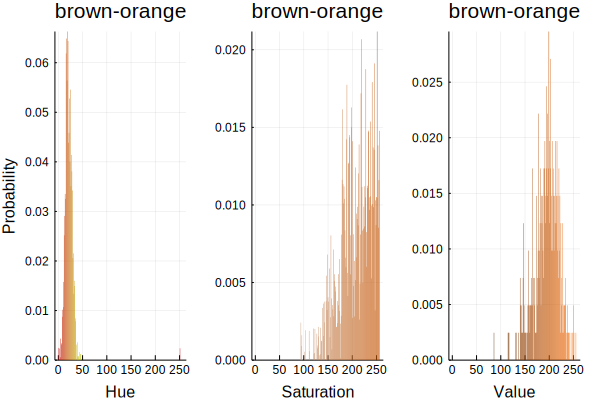

(h_max, s_max, v_max) = (0.07058823529411765, 0.984313725490196, 0.7725490196078432)


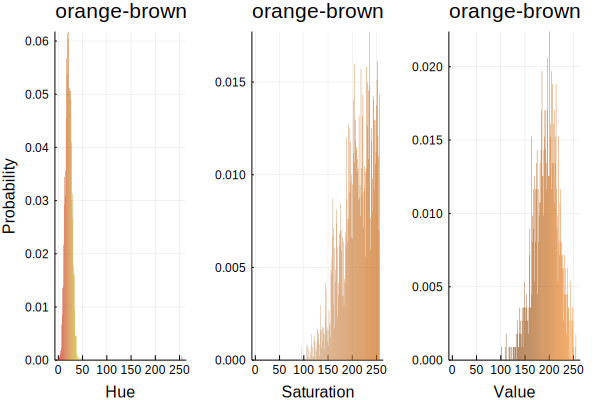

(h_max, s_max, v_max) = (0.0784313725490196, 0.9176470588235294, 0.7843137254901961)


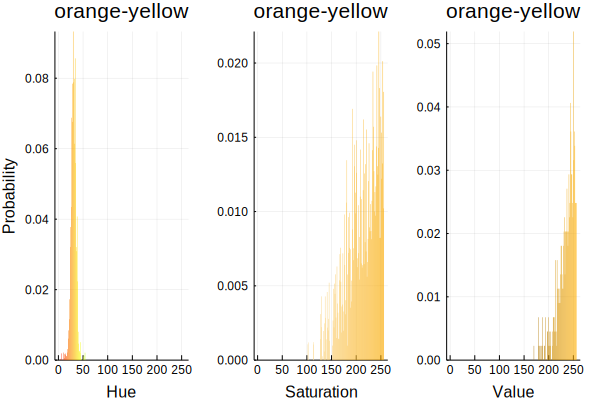

(h_max, s_max, v_max) = (0.11372549019607843, 0.9607843137254902, 0.9764705882352941)


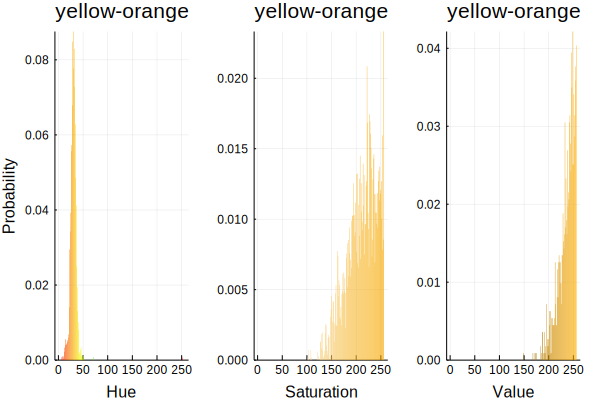

(h_max, s_max, v_max) = (0.11372549019607843, 1.0, 0.9686274509803922)


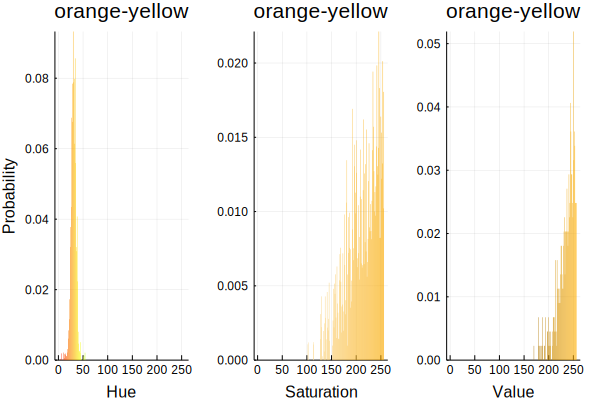

(h_max, s_max, v_max) = (0.11372549019607843, 0.9607843137254902, 0.9764705882352941)


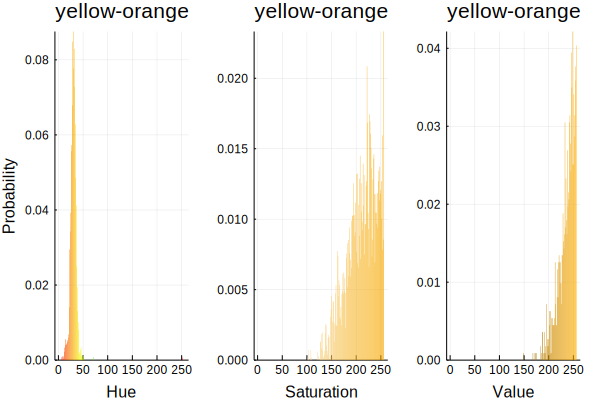

(h_max, s_max, v_max) = (0.11372549019607843, 1.0, 0.9686274509803922)


false

In [68]:
qualitative_demo(noml_unsmoothed)


In [44]:
noml_smoothed = TermToColorDistributionEmpirical(256)
train!(noml_smoothed, cldata, Val{true}())
@show evaluate(noml_smoothed, cldata.dev)

evaluate(noml_smoothed, cldata.dev) = Dict(:perp=>1.18478e6,:perp_val=>121.869,:mse_to_distmean=>0.0663693,:perp_sat=>162.934,:mse_to_distmode=>0.109332,:perp_hue=>59.6666)


Dict{Symbol,Float64} with 6 entries:
  :perp            => 1.18478e6
  :perp_val        => 121.869
  :mse_to_distmean => 0.0663693
  :perp_sat        => 162.934
  :mse_to_distmode => 0.109332
  :perp_hue        => 59.6666

In [59]:
qualitative_demo(noml_smoothed)

In [46]:
hp, sp, vp = query(noml_smoothed, cldata.dev.texts)
mse_from_distmean(cldata.dev.colors, (hp', sp', vp'))

0.0663693462975219

In [47]:
mse_from_peak(cldata.dev.colors, (hp', sp', vp'))

0.10933245009886777

In [48]:
hp, sp, vp = query(noml_smoothed, cldata.dev.texts)
dm = distmean(hp', sp', vp');

In [53]:
[dm cldata.dev.colors]

108545×6 Array{Float64,2}:
 0.276789  0.842012  0.879302  0.328092   0.665272  0.937255
 0.276789  0.842012  0.879302  0.241007   0.712821  0.764706
 0.276789  0.842012  0.879302  0.274707   0.780392  1.0     
 0.276789  0.842012  0.879302  0.353462   0.896104  0.905882
 0.276789  0.842012  0.879302  0.223856   0.846473  0.945098
 0.276789  0.842012  0.879302  0.219101   0.700787  0.996078
 0.276789  0.842012  0.879302  0.20546    0.954733  0.952941
 0.276789  0.842012  0.879302  0.184783   0.987124  0.913725
 0.276789  0.842012  0.879302  0.204225   0.883817  0.945098
 0.276789  0.842012  0.879302  0.253876   0.830918  0.811765
 0.276789  0.842012  0.879302  0.299065   0.968326  0.866667
 0.276789  0.842012  0.879302  0.298712   0.936652  0.866667
 0.276789  0.842012  0.879302  0.287597   0.968468  0.870588
 ⋮                                                  ⋮       
 0.165535  0.626158  0.707594  0.142694   0.67907   0.843137
 0.165535  0.626158  0.707594  0.146505   0.751515  0.6470

# Oracle


In [50]:
oracle_cldata = load_munroe_data(dev_as_train=true, dev_as_test=true, encoding_ = enc)
oracle_noml_unsmoothed =  TermToColorDistributionEmpirical(256)
train!(oracle_noml_unsmoothed, oracle_cldata, Val{false}(); remove_zeros_hack=false)
@show evaluate(oracle_noml_unsmoothed, oracle_cldata.dev)

evaluate(oracle_noml_unsmoothed, oracle_cldata.dev) = Dict(:perp=>5.25441e5,:perp_val=>89.0333,:mse_to_distmean=>0.0662781,:perp_sat=>118.703,:mse_to_distmode=>0.115161,:perp_hue=>49.7174)


Dict{Symbol,Float64} with 6 entries:
  :perp            => 5.25441e5
  :perp_val        => 89.0333
  :mse_to_distmean => 0.0662781
  :perp_sat        => 118.703
  :mse_to_distmode => 0.115161
  :perp_hue        => 49.7174

(h_max, s_max, v_max) = (0.0, 1.0, 0.12156862745098039)


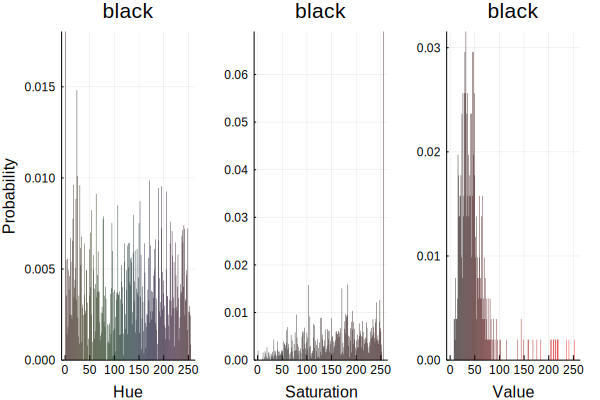

In [54]:
plot_query(oracle_noml_unsmoothed, "black")